# Import library

In [4]:
! pip install tensorflow
! pip install opencv-python
! pip install pandas
! pip install numpy
! pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.5 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import shuffle
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


import cv2

from sklearn.model_selection import train_test_split

# Import data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

import os

BASE_DIR = '/content/drive/MyDrive/Semester 8/projekcv/shapes'
shapes = os.listdir(BASE_DIR)
print(shapes)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['circle', 'square', 'triangle', 'star']


In [7]:
data = []
target = []
for i, shape in enumerate(shapes):
    path = os.path.join(BASE_DIR, shape)
    for filename in os.listdir(path):
        image = cv2.imread(os.path.join(path , filename),0)
        image = image.reshape(200,200,1)
        data.append(image)
        target.append(i)

# Preprocessing

In [8]:
data = np.array(data)
target = np.array(target)
target = to_categorical(target)

In [9]:

data.shape, target.shape

((14962, 200, 200, 1), (14962, 4))

In [10]:
X_full, X_test, y_full, y_test = train_test_split(data, target, stratify=target, random_state= 42, test_size = 0.25)
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, stratify=y_full, random_state= 42, test_size = 0.15)

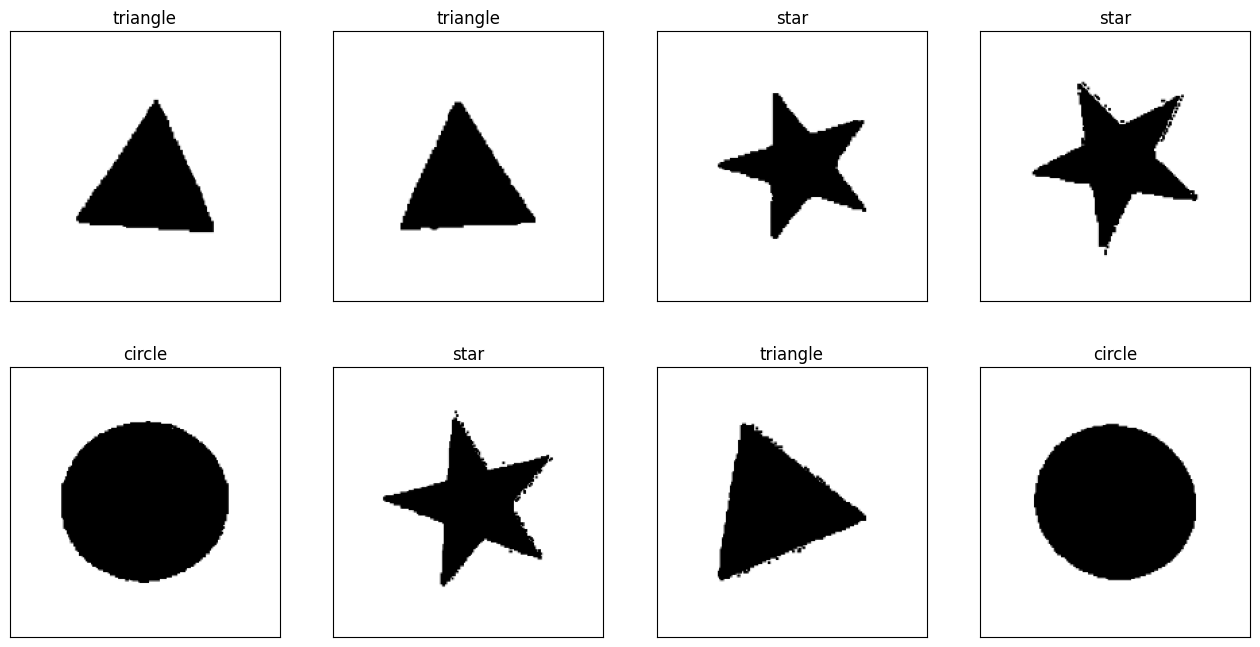

In [11]:
def show_images(count, X, y):
    fig, axes =plt.subplots(count//4,4, figsize = (16, count))
    for i, ind in enumerate(np.random.randint(0, X.shape[0] , count)):
        ax = axes[i//4][i%4]
        ax.imshow(X[ind],cmap = 'gray')
        ax.title.set_text(shapes[np.argmax(y[ind])])
        ax.set_xticks([])
        ax.set_yticks([])
show_images(8, X_train, y_train)

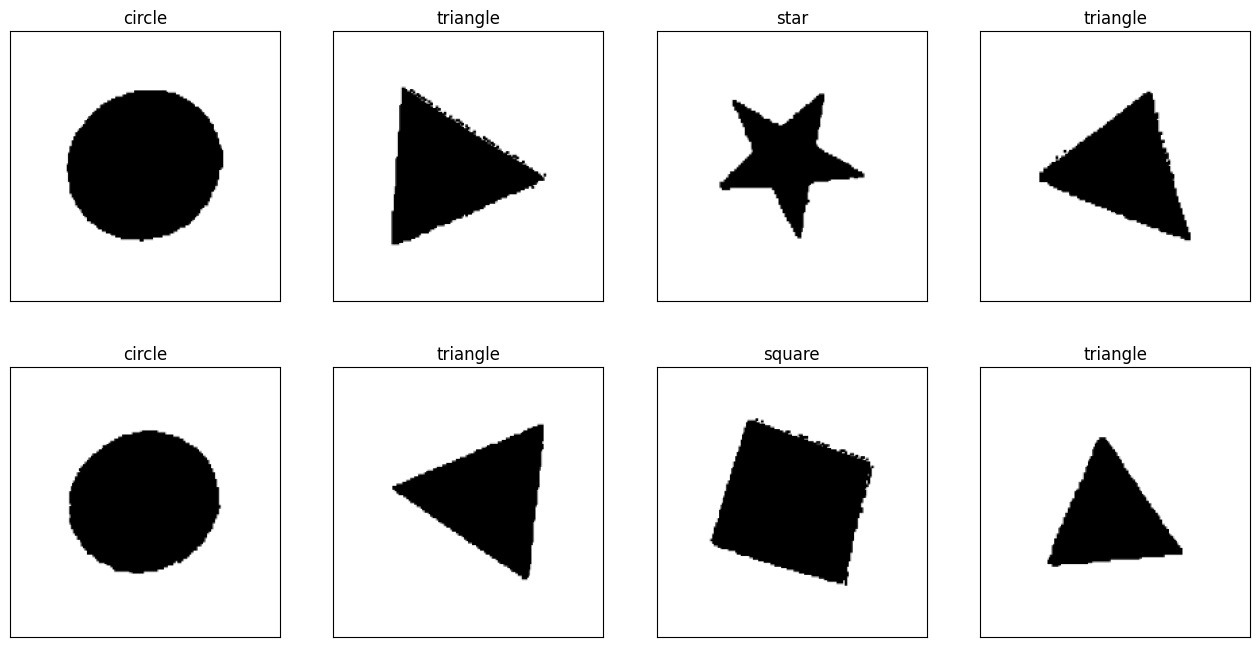

In [12]:

show_images(8, X_val, y_val)


In [13]:
train_datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale = 1.0/255,
    horizontal_flip=True,
    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale = 1.0/255)

In [14]:

X_test = X_test/255.0
X_train = X_train/255.0
X_val = X_val/255.0

In [16]:
model = Sequential([
    Conv2D(32, (3,3),strides = 2 ,input_shape = (200,200,1), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(4, activation = 'softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 99, 99, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,244 (399.39 KB)

 Trainable params: 102,244 (399.39 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 5, validation_data = (X_val, y_val))

Epoch 1/5
299/299 ━━━━━━━━━━━━━━━━━━━━ 82s 267ms/step - accuracy: 0.5983 - loss: 0.8461 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 2/5
299/299 ━━━━━━━━━━━━━━━━━━━━ 77s 258ms/step - accuracy: 0.9861 - loss: 0.0439 - val_accuracy: 0.9994 - val_loss: 9.7246e-04
Epoch 3/5
299/299 ━━━━━━━━━━━━━━━━━━━━ 79s 263ms/step - accuracy: 0.9953 - loss: 0.0218 - val_accuracy: 1.0000 - val_loss: 7.7685e-05
Epoch 4/5
299/299 ━━━━━━━━━━━━━━━━━━━━ 77s 255ms/step - accuracy: 0.9965 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 3.4068e-06
Epoch 5/5
299/299 ━━━━━━━━━━━━━━━━━━━━ 78s 260ms/step - accuracy: 0.9974 - loss: 0.0121 - val_accuracy: 1.0000 - val_loss: 1.0772e-06


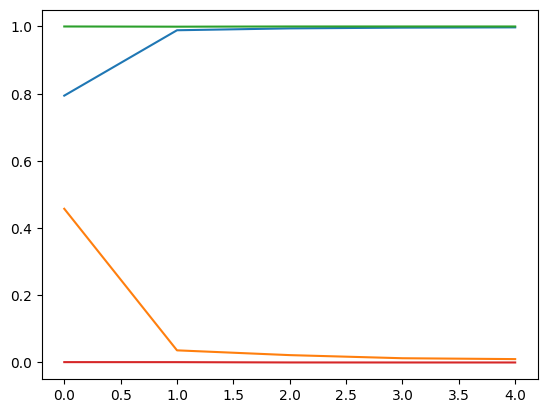

In [18]:
metrics = pd.DataFrame(history.history)
plt.plot(metrics)

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy is {}%'.format(accuracy*100))

117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 1.0000 - loss: 8.5772e-06
Accuracy is 100.0%


In [21]:
def show_images_predicted(count, X, y):
    fig, axes =plt.subplots(count//4,4, figsize = (16, count))
    for i, ind in enumerate(np.random.randint(0, X.shape[0] , count)):
        ax = axes[i//4][i%4]
        ax.imshow(X[ind],cmap = 'gray')
        res=""
        if y[ind][0]==1:
            res+="circle"
        if y[ind][1]==1:
            res+="square"
        if y[ind][2]==1:
            res="star"
        if y[ind][3]==1:
            res="triangle"
        ax.title.set_text(res)
        ax.set_xticks([])
        ax.set_yticks([])

117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step


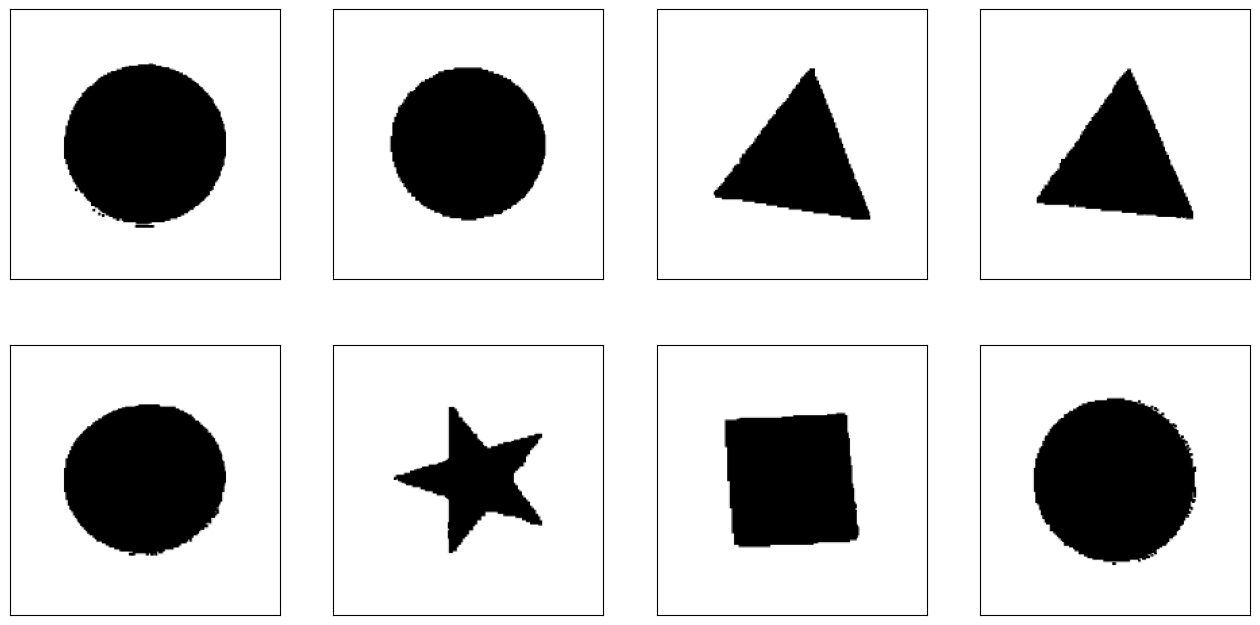

In [22]:
preds = model.predict(X_test)
show_images_predicted(8,X_test, preds)

In [23]:
! pip install pickle-mixin

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5988 sha256=85879cc0a5351cd0e363412f11005753767d33584751aaa6e8fc64f524db48b3
  Stored in directory: /root/.cache/pip/wheels/d0/9c/0d/8709be17c02b72bf04ea60d8ec64fc46a1554c0fb81e048dd6
Successfully built pickle-mixin


In [27]:
from google.colab import drive
drive.mount('/content/drive')

import pickle
from tensorflow.keras.models import save_model

# Muat model dari pickle
pkl_model_path = '/content/drive/MyDrive/Semester 8/projekcv/hasil_model/model.pkl'
with open(pkl_model_path, 'rb') as f:
    model = pickle.load(f)

# Simpan model ke format .h5
h5_model_path = '/content/drive/MyDrive/Semester 8/projekcv/hasil_model/model.h5'
model.save(h5_model_path)

print(f"Model berhasil disimpan dalam format .h5 di: {h5_model_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model berhasil disimpan dalam format .h5 di: /content/drive/MyDrive/Semester 8/projekcv/hasil_model/model.h5
